# Abritrary Function Approximation

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

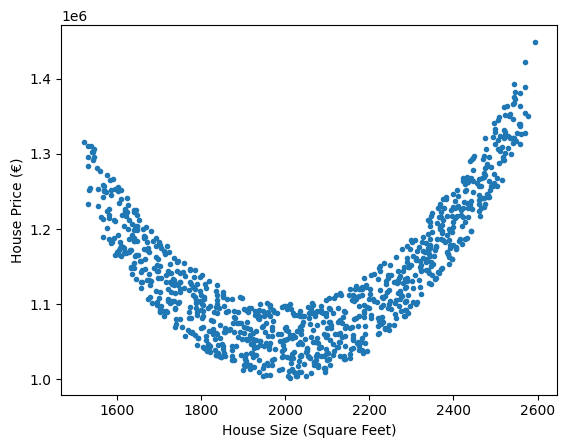

In [4]:
# Dataset: House sizes (in square feet) and their corresponding prices (in €)
house_sizes = (np.linspace(15, 25, 1000) + np.random.random((1000))) * 100
house_prices = (house_sizes ** 2) + (-4000 * house_sizes) + (5e6 + np.random.random((1000)) * 1e5)

plt.plot(house_sizes, house_prices, '.')
plt.xlabel('House Size (Square Feet)'); plt.ylabel('House Price (€)')
plt.show()

In [5]:
# Hypothesis function: h(x) = ax2 + bx + c
def hypothesis(a, b, c, x):
    return  (a * (x ** 2)) + (b * x) + c

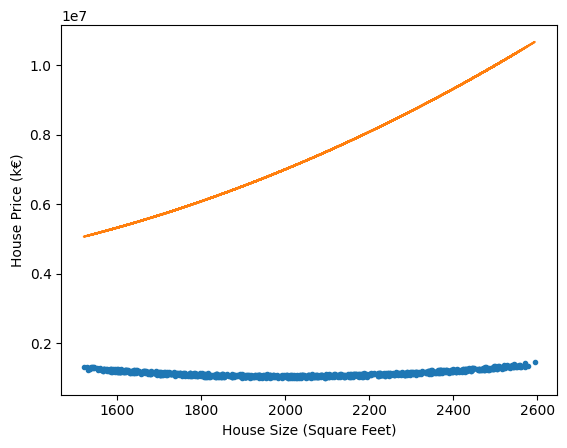

In [6]:
preds = hypothesis(2, -3000, 5e6, house_sizes) # Random values for m and c
plt.plot(house_sizes, house_prices, '.')
plt.plot(house_sizes, preds, '-') 
plt.xlabel('House Size (Square Feet)')
plt.ylabel('House Price (k€)')
plt.show()

In [7]:
# Cost function: Mean Squared Error
def cost_function(a, b, c, x, y):
    M = len(y)
    return (1/(2*M)) * np.sum((y - hypothesis(a, b, c, x))**2)

In [8]:

# Gradient Descent Algorithm
def gradient_descent(a, b, c, x, y, learning_rate, iterations):
    M = len(y)
    cost_history = []

    for _ in range(iterations):
        # Compute the gradients 
        da = (1/M) * np.sum((hypothesis(a, b, c, x) - y) * (x ** 2))
        db = (1/M) * np.sum((hypothesis(a, b, c, x) - y) * x)
        dc = (1/M) * np.sum((hypothesis(a, b, c, x) - y))

        # Update parameters
        a = a - learning_rate * da
        b = b - learning_rate * db
        c = c - learning_rate * dc

        # Save the cost for each iteration
        cost_history.append(cost_function(a, b, c, x, y))

    return a, b, c, cost_history

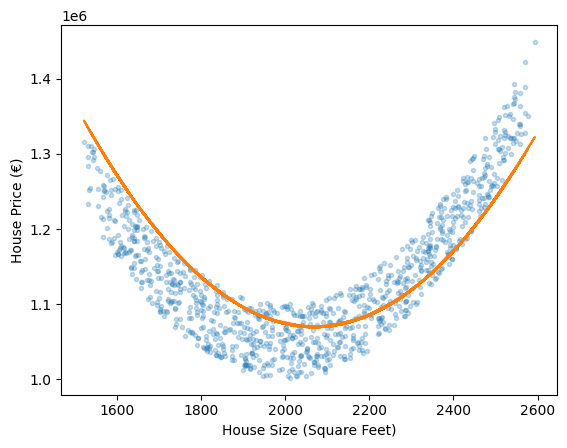

<Figure size 640x480 with 0 Axes>

Final values: (0.9184065708355961, -3800.000509308891, 4999999.999999763)
Cost history: [1217408175.8152065, 1217408174.6445444, 1217408173.4739249, 1217408172.3033302, 1217408171.132752, 1217408169.9621851, 1217408168.7916243, 1217408167.6210656, 1217408166.4505122, 1217408165.2799659, 1217408164.1094182, 1217408162.9388726, 1217408161.7683268, 1217408160.5977812, 1217408159.427235]


<Figure size 640x480 with 0 Axes>

In [9]:
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

cost_history = []
iterations = 100

def train():
    # Training the model
    a, b, c = 2, -3800, 5e6  # Initial values of parameters
    learning_rate = 1e-14  # You may need to adjust it
    
    for i in range(iterations):
        print("Iteration number: ", i+1)
        a, b, c, ch = gradient_descent(a, b, c, house_sizes, house_prices, learning_rate, 1)
        time.sleep(0.1)  # Sleep for visualization
        clear_output(wait=True)

        preds = hypothesis(a, b, c, house_sizes)
        plt.plot(house_sizes, house_prices, '.', alpha=0.25)
        plt.plot(house_sizes, preds, '-')
        plt.xlabel('House Size (Square Feet)'); plt.ylabel('House Price (€)')
        plt.show()
        
        display(plt.gcf())
        cost_history.append(ch[0])

    return a, b, c, cost_history

A, B, C, cost_history = train()

print(f'Final values: {A, B, C}')
print(f'Cost history: {cost_history[-15:]}')  # Print the last 5 costs to check convergence

## Enter Neural Nets

Instead of having to know how to optimize the parameters of a hypothesis function, we can let a neural network learn weights which would act as parameters of the unknown function between the features and labels.

In [10]:
import torch
import torch.optim as optim
from tqdm import tqdm

In [11]:
dataset = torch.tensor(np.array([house_sizes, house_prices]), dtype=torch.double)
mean, std = dataset.mean(dim=0), dataset.std(dim=0)
dataset = (dataset - mean) / std

trainloader = torch.utils.data.DataLoader(dataset.T, batch_size=8, shuffle=True)
dataset = (dataset * std) + mean

In [12]:
class AFA(torch.nn.Module):
    def __init__(self):
        super(AFA, self).__init__()
        self.fc1 = torch.nn.Linear(1, 5)
        self.fc2 = torch.nn.Linear(5, 5)
        self.fc3 = torch.nn.Linear(5, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

net = AFA()
net = net.to(device=torch.device("cpu"), dtype=torch.double)

In [13]:
optimizer = optim.SGD(net.parameters(), lr=1e-4)

def train(net, trainloader, optimizer, epochs = 100):
    losslog = []
    
    for epoch in tqdm(range(epochs)):  # loop over the dataset multiple times
        for i, data in enumerate(trainloader):
            inputs, labels = data.T.unsqueeze(dim=2)
            
            optimizer.zero_grad()
            outputs = net(inputs)
            
            loss = torch.nn.functional.mse_loss(outputs, labels)
            
            # Backpropagate: calculate gradients
            loss.backward()
            
            # Optimize: adjust weights acc to gradient
            optimizer.step()
            
            losslog += [loss.detach().item()]
            
    return losslog

train(net, trainloader, optimizer)
print('Finished Training')

100%|██████████| 100/100 [00:01<00:00, 50.06it/s]

Finished Training


In [14]:
# Inferece
with torch.no_grad():
    predicted_price = net(dataset[0].unsqueeze(dim=1)).squeeze(dim=1)

predicted_price = (predicted_price * std) + mean


### Plot predictions of the NN

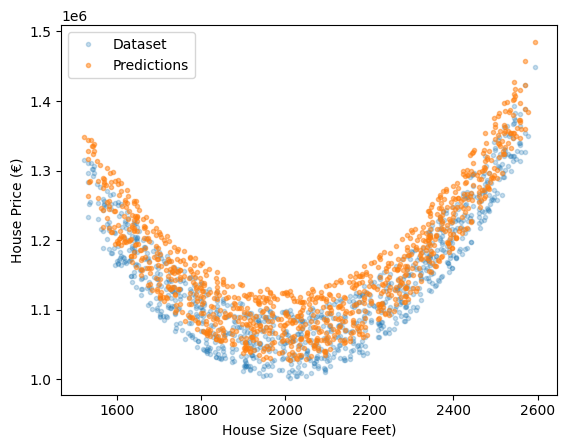

In [15]:
plt.plot(house_sizes, house_prices, '.', alpha=0.25, label="Dataset")
plt.plot(house_sizes, predicted_price, '.', alpha=0.5, label="Predictions")
plt.xlabel('House Size (Square Feet)'); plt.ylabel('House Price (€)')
plt.legend()
plt.show()

## It doesn't matter what curve the data follows

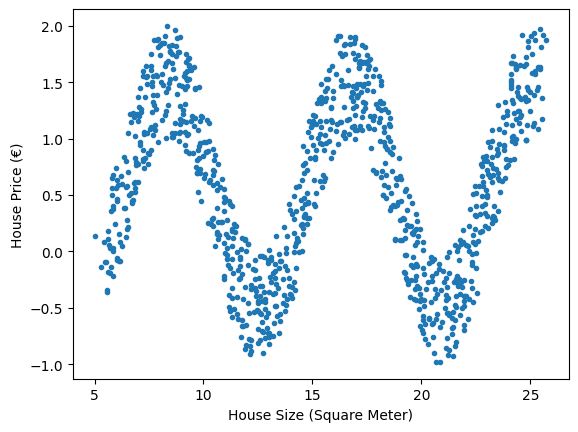

In [17]:
X = (np.linspace(5, 25, 1000) + np.random.random((1000)))
Y = np.cos(0.75 * X) + np.random.random((1000))

plt.plot(X, Y, '.')
plt.xlabel('House Size (Square Meter)'); plt.ylabel('House Price (€)')
plt.show()

dataset_arb = torch.tensor(np.array([X, Y]), dtype=torch.double)
mean, std = dataset_arb.mean(dim=0), dataset_arb.std(dim=0)
dataset_arb = (dataset_arb - mean) / std

trainloader_arb = torch.utils.data.DataLoader(dataset_arb.T, batch_size=8, shuffle=True)
dataset_arb = (dataset_arb * std) + mean

We can use the same simple model but train it on more complex data

In [18]:
losslog = train(net, trainloader_arb, optimizer=optim.SGD(net.parameters(), lr=1e-4))

100%|██████████| 100/100 [00:01<00:00, 50.62it/s]


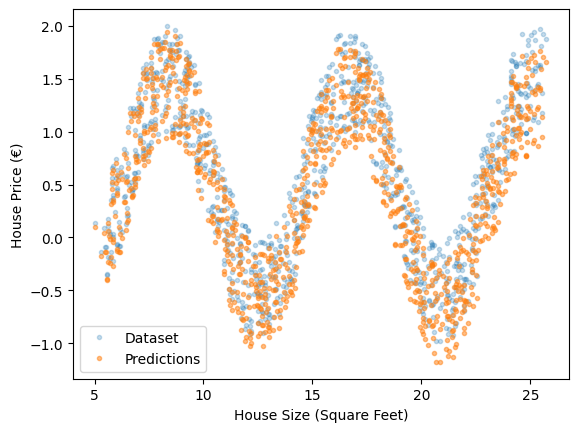

In [19]:
# Inferece
with torch.no_grad():
    Y_ = net(dataset_arb[0].unsqueeze(dim=1)).squeeze(dim=1)
    Y_ = (Y_ * std) + mean

# Plot the final model
plt.plot(X, Y, '.', alpha=0.25, label="Dataset")
plt.plot(X, Y_, '.', alpha=0.5, label="Predictions")
plt.xlabel('House Size (Square Feet)'); plt.ylabel('House Price (€)')
plt.legend()
plt.show()

Evidently the neural network is capable of approximating any function in the data, making it a universal function approximator. This is why NNs are the top choice when we want to learn an unknown function between a feature set and label set.